### __연습문제__

In [24]:
import pandas as pd

data = {'이름': ['John', 'Steve', 'Sarah', 'Ann', 'Mike'],
        '나이': [25, 32, 28, 35, 41],
        '성별': ['남', '남', '여', '여', '남'],
        '키': [175, 180, 163, 155, 190]}
df = pd.DataFrame(data)
#print(df)

# 1. 학년 추가
df['학년'] = '3학년'
#print(df)

# 2. 국적 열추가, 각 행에 맞춰 국적을 넣기
df['국적'] = ['미국','영국','프랑스','이탈리아','캐나다']
df

# 3. 성별이 '여'인 사람만 남기고 나머지 행 삭제(성별이 '여'인 행만 가져오면 됨)
df1 = df[df['성별']=='여']
df1

# 4. 나이를 기준으로 내림차순 행 정렬
df2 = df.sort_values(by='나이',ascending=False)
df2

# 5. index==2인 행 삭제
df3 = df.drop(2)
df3

# 6. 새로운 행 3개 추가
new_rows = ([{'이름': 'Alex', '나이': 22, '성별': '남', '키': 180, '학년': '2학년', '국적': '미국'}, {'이름': 'Emily', '나이': 29, '성별': '여', '키': 165, '학년': '1학년', '국적': '캐나다'}, {'이름': 'Daniel', '나이': 33, '성별': '남', '키': 175, '학년': '3학년', '국적': '호주'}]
)
df4 = df.append(new_rows,ignore_index=True)
df4

# 7. '이름' 열을 기준으로 오름차순 행 정렬
df5 = df4.sort_values(by='이름',ascending=True)
df5

# 8. '키' 열의 단위 cm -> m로 변경
df['키'] = df['키']/100
df

# 9. '성별' 열 삭제
df6 = df4.drop('성별',axis=1)
df6


C:\Users\USER\AppData\Local\Temp\ipykernel_6260\3132236349.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df.append(new_rows,ignore_index=True)


,이름,나이,키,학년,국적
0,John,25,175,3학년,미국
1,Steve,32,180,3학년,영국
2,Sarah,28,163,3학년,프랑스
3,Ann,35,155,3학년,이탈리아
4,Mike,41,190,3학년,캐나다
5,Alex,22,180,2학년,미국
6,Emily,29,165,1학년,캐나다
7,Daniel,33,175,3학년,호주


In [31]:
import pandas as pd

# 예시 데이터프레임 생성
data = {'학과': ['전산학과', '전자공학과', '전자공학과', '경영학과', '경영학과'],
        '성적': [80, 90, 75, 85, 95],
        '인원': [50, 40, 35, 60, 55]}
df = pd.DataFrame(data)
df

# '학과' 열을 기준으로 그룹화한 후 '성적' 열에 대해 평균과 합계 계산
grouped = df.groupby('학과')

summary = grouped['성적'].agg(['mean','sum'])
print(summary)

       mean  sum
학과              
경영학과   90.0  180
전산학과   80.0   80
전자공학과  82.5  165


## __Pivot_table__
  
 - DataFrame에서 특정 열을 그룹화하여 행/열을 피벗테이블 형태로 나타낼 수 있듬
 

    Grade  Score  Subject
0       1     90  English
1       3     67  English
2       2     91  English
3       2     52  English
4       2     98  English
5       3     59     Math
6       2     84   Korean
7       1     58     Math
8       2     58     Math
9       2     70  English
10      3     56  English
11      3     94     Math
12      1     71     Math
13      2     66  English
14      1     83  English
15      3     76   Korean
16      1     65  English
17      3     67   Korean
18      2     86     Math
19      1     81  English
20      3     72   Korean
21      1     79   Korean
22      3     57     Math
23      1     87     Math
24      2     58   Korean
25      1     91     Math
26      2     55   Korean
27      2     57   Korean
28      2     85     Math
29      3     56  English


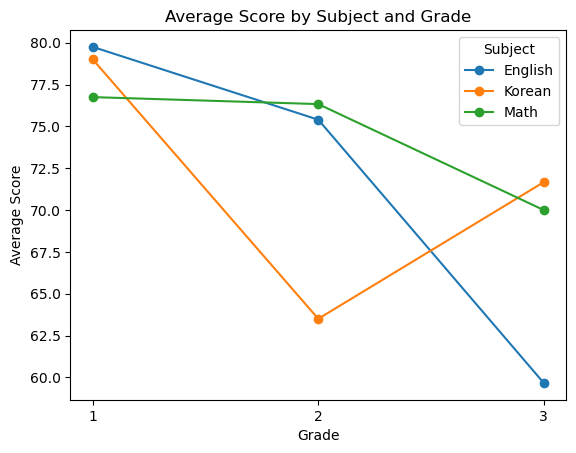

In [35]:
# pivot_table 예제

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성
data = {'Grade': np.random.randint(1, 4, size=30),
        'Score': np.random.randint(50, 100, size=30),
        'Subject': np.random.choice(['Math', 'English', 'Korean'], size=30)}
df = pd.DataFrame(data)
print(df)

# 과목별 평균 성적 계산
pivot_table = df.pivot_table(index='Grade', columns='Subject', values='Score', aggfunc='mean')

# 선 그래프 그리기
pivot_table.plot(kind='line', marker='o')
plt.title('Average Score by Subject and Grade')
plt.xlabel('Grade')
plt.ylabel('Average Score')
plt.legend(title='Subject')
plt.xticks(pivot_table.index)
plt.show()


In [42]:
import pandas as pd

# pd.to_datetime() : 문자열이나 다른 형식의 날짜와 시간 데이터를 datetime 형식으로 변환할 때 사용

data = {'date': ['2021-08-15', '2021-08-16', '2021-08-17'],
        'value': [100, 200, 150]}
df = pd.DataFrame(data)

df['date'] = pd.to_datetime(df['date'])
print(df)


        date  value
0 2021-08-15    100
1 2021-08-16    200
2 2021-08-17    150


In [44]:
import pandas as pd

# - pd.resample() ; 기존의 데이터셋을 새로운 시간 간격에 맞추어 변환

data = {'date': ['2022-01-01', '2022-01-02', '2022-01-01', '2022-01-02', '2022-01-01', '2022-01-02'],
        'location': ['서울', '서울', '부산', '부산', '대구', '대구'],
        'PM10': [50, 40, 45, 55, 60, 65],
        'PM2.5': [25, 20, 22, 28, 30, 35]}
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

df_monthly = df.groupby('location').resample('D', on='date').mean(numeric_only=True)
df_monthly


PM10  PM2.5
location date                   
대구       2022-01-01  60.0   30.0
         2022-01-02  65.0   35.0
부산       2022-01-01  45.0   22.0
         2022-01-02  55.0   28.0
서울       2022-01-01  50.0   25.0
         2022-01-02  40.0   20.0

- 시계열 데이터 변환
    - __pd.resample()__    
  __시간 간격(alias) 문자열__  
  - B: 평일(Business day) 기준으로 간격 지정  
  - C: 사용자 지정 시간대 내에서의 주기마다 간격 지정  
  - D: 달력 일(Day) 기준으로 간격 지정  
  + W: 주(Week) 기준으로 간격 지정  
  - M: 달(Month)의 마지막 날 기준으로 간격 지정  
  + SM: 반월(Semi-Month) 기준으로 간격 지정 (월의 15일과 말일을 기준)  
  + BM: 평일 기준으로 한 달의 마지막 날까지 간격 지정  
  + CBM: 사용자 지정 시간대 내에서 평일 기준으로 한 달의 마지막 날까지 간격 지정  
  + MS: 달(Month)의 시작일 기준으로 간격 지정  
  + SMS: 반월(Semi-Month) 기준으로 간격 지정 (월의 1일과 15일을 기준)  
  + BMS: 평일 기준으로 한 달의 시작일부터 마지막 날까지 간격 지정  
  + CBMS: 사용자 지정 시간대 내에서 평일 기준으로 한 달의 시작일부터 마지막 날까지 간격 지정  
  + Q: 분기(Quarter)의 마지막 날 기준으로 간격 지정  
  + BQ: 평일 기준으로 분기의 마지막 날까지 간격 지정  
  + QS: 분기(Quarter)의 시작일 기준으로 간격 지정  
  + BQS: 평일 기준으로 분기의 시작일부터 마지막 날까지 간격 지정  
  + A: 해(Year)의 마지막 날 기준으로 간격 지정  
  + BA: 평일 기준으로 해의 마지막 날까지 간격 지정  
  + AS: 해(Year)의 시작일 기준으로 간격 지정  
  + BAS: 평일 기준으로 해의 시작일부터 마지막 날까지 간격 지정  
